In [ ]:
# Thompson Sampling

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv(r'C:\Users\akiper\Desktop\Machine Learning Course\Machine-Learning-A-Z-New\Machine Learning A-Z New\Part 6 - Reinforcement Learning\Section 33 - Thompson Sampling\Ads_CTR_Optimisation.csv')

In [46]:
#Implementing UCB
import random
N = 500 # Total number of users
d = 10 #Number of ads
ads_selected = [] #full list of ads that are selected over the rounds/users
numbers_of_reward_1 = [0] * d
numbers_of_reward_0 = [0] * d
total_reward = 0
for n in range(0, N): #iterate through each round; each round we will show a user an ad and they will select yes or no
    ad = 0 #The ad that will be selected at each round, N
    max_random = 0 #maximum of random draws/highest value that can be attained from randomly selecting ad
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_reward_1[i] + 1, numbers_of_reward_0[i] + 1)
        if(random_beta > max_random): #check if random draw is higher than max random draw; if so, max random draw has to be updated to become new random beta; at same time, we will select that ad 
            max_random = random_beta
            ad = i
    ads_selected.append(ad) #appends ad to full list of ads selected; input of histogram 
    reward = dataset.values[n, ad] #value in the dataset corresponding to the row we are dealing with in the 1st for loop and the column of the ad that was just selected;the reward is the value we get after selecting this ad to show this specific user
    if reward == 1:
        numbers_of_reward_1[ad] = numbers_of_reward_1[ad] + 1
    else: 
        numbers_of_reward_0[ad] = numbers_of_reward_0[ad] + 1
    total_reward = total_reward + reward

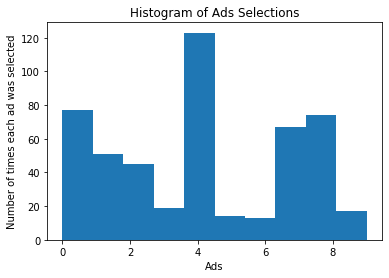

In [47]:
#Visualizing the results
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()